In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Imports for plotting
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score, f1_score,balanced_accuracy_score,roc_curve,roc_auc_score,confusion_matrix

In [6]:
baseline=pd.read_csv('../Model_Results/01_best_predictions_and_best_prob_baseline_model.csv')
gaussian_noise=pd.read_csv("../Model_Results/02_best_predictions_and_best_prob_gaussian_noise_model.csv")
gaussian_blur=pd.read_csv("../Model_Results/best_predictions_and_best_prob_gaussian_blur_model.csv")
rotate = pd.read_csv("../Model_Results/best_predictions_and_best_prob_rotate_model.csv")
color_jitter=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c20_model.csv")

baseline


Accuracy Score:  0.8425
Precision Score:  0.8246445497630331
Recall Score:  0.87
F1 Score:  0.8467153284671532
Balanced Accuracy Score:  0.8425
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       200
           1       0.82      0.87      0.85       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400


AUC:  0.91245


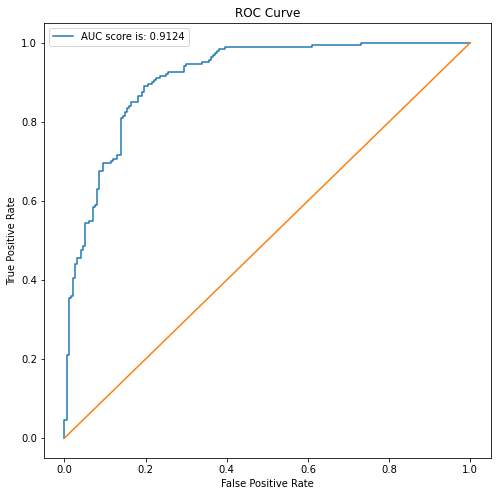

----------------------------------------------------
gaussian_noise


Accuracy Score:  0.82
Precision Score:  0.82
Recall Score:  0.82
F1 Score:  0.82
Balanced Accuracy Score:  0.82
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       200
           1       0.82      0.82      0.82       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400


AUC:  0.897625


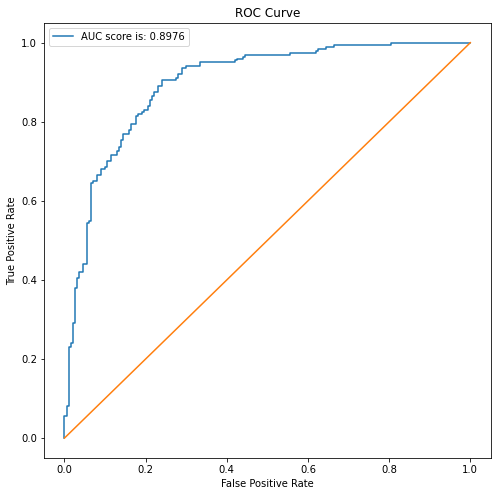

----------------------------------------------------
gaussian_blur


Accuracy Score:  0.86
Precision Score:  0.86
Recall Score:  0.86
F1 Score:  0.8599999999999999
Balanced Accuracy Score:  0.86
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       200
           1       0.86      0.86      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400


AUC:  0.9288250000000001


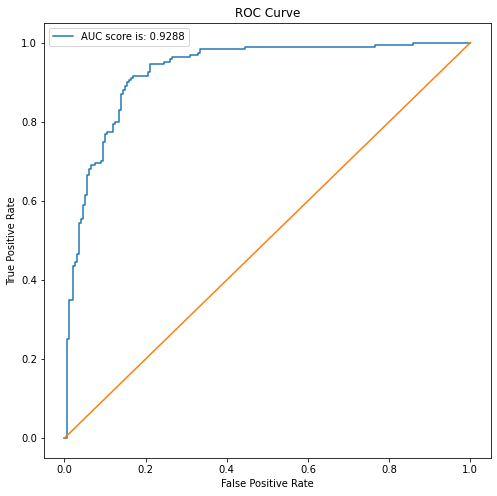

----------------------------------------------------
rotate


Accuracy Score:  0.83
Precision Score:  0.7946428571428571
Recall Score:  0.89
F1 Score:  0.839622641509434
Balanced Accuracy Score:  0.8300000000000001
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       200
           1       0.79      0.89      0.84       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400


AUC:  0.9072


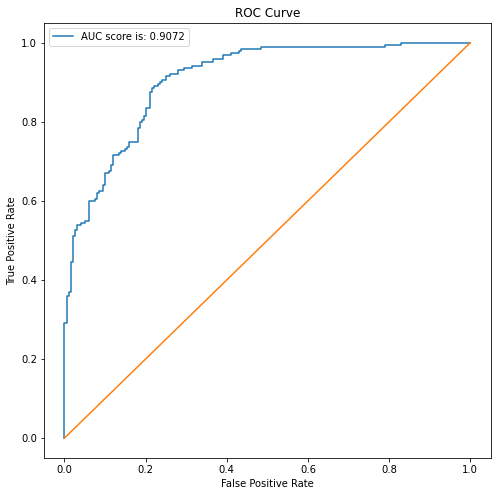

----------------------------------------------------
color_jitter


Accuracy Score:  0.845
Precision Score:  0.8709677419354839
Recall Score:  0.81
F1 Score:  0.8393782383419689
Balanced Accuracy Score:  0.845
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       200
           1       0.87      0.81      0.84       200

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400


AUC:  0.920075


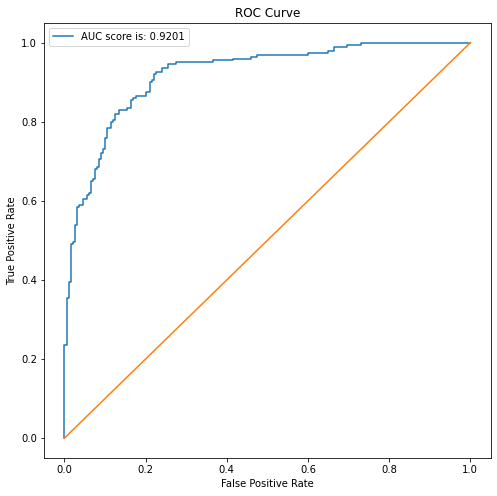

----------------------------------------------------


In [7]:
def print_model_results(data,aug,df):
    print(aug)
    print()
    print()
    print("Accuracy Score: ",accuracy_score(data['y_test'].values,data['best_predictions'].values))
    print("Precision Score: ",precision_score(data['y_test'].values,data['best_predictions'].values))
    print("Recall Score: ",recall_score(data['y_test'].values,data['best_predictions'].values))
    print("F1 Score: ", f1_score(data['y_test'].values,data['best_predictions'].values))
    print("Balanced Accuracy Score: ", balanced_accuracy_score(data['y_test'].values,data['best_predictions'].values))
    

                                               
    print("Classification Report: ")
    print(classification_report(data['y_test'].values,data['best_predictions'].values))
    print()
    fpr, tpr, thresholds = roc_curve(data['y_test'].values, data['best_output_probs'].values)
    auc = roc_auc_score(data['y_test'].values, data['best_output_probs'].values)
    print("AUC: ",auc)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='AUC score is: '+str(round(auc, 4)))
    plt.plot([0,1],[0,1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    df.loc[len(df)] = [aug.upper(),accuracy_score(data['y_test'].values,data['best_predictions'].values),
                       precision_score(data['y_test'].values,data['best_predictions'].values),
                       recall_score(data['y_test'].values,data['best_predictions'].values),
                       balanced_accuracy_score(data['y_test'].values,data['best_predictions'].values),
                      auc]
                                               
    
    print("----------------------------------------------------")
    
    return df
df=pd.DataFrame(columns=["Model","Accuracy Score","Precision Score", "F1 Score","Balanced Accuracy Score", "AUC"])
for i,aug in zip([baseline,gaussian_noise,gaussian_blur,rotate,color_jitter],['baseline','gaussian_noise','gaussian_blur','rotate','color_jitter']):
    
    _=print_model_results(i,aug,df)
    

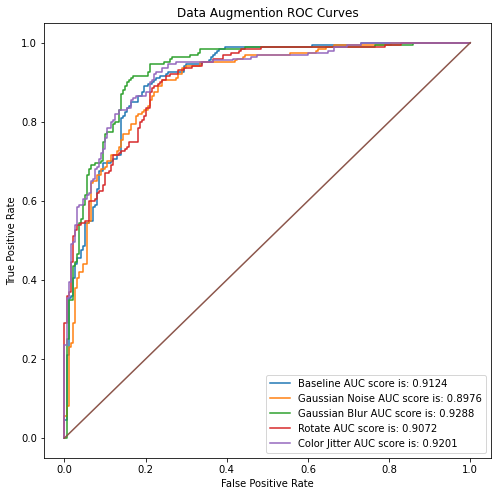

In [11]:
baseline,gaussian_noise,gaussian_blur,rotate,color_jitter

fpr_b, tpr_b, thresholds = roc_curve(baseline['y_test'].values, baseline['best_output_probs'].values)
auc_b = roc_auc_score(baseline['y_test'].values, baseline['best_output_probs'].values)

fpr_gn, tpr_gn, thresholds = roc_curve(gaussian_noise['y_test'].values, gaussian_noise['best_output_probs'].values)
auc_gn = roc_auc_score(gaussian_noise['y_test'].values, gaussian_noise['best_output_probs'].values)

fpr_gb, tpr_gb, thresholds = roc_curve(gaussian_blur['y_test'].values, gaussian_blur['best_output_probs'].values)
auc_gb = roc_auc_score(gaussian_blur['y_test'].values, gaussian_blur['best_output_probs'].values)

fpr_cj, tpr_cj, thresholds = roc_curve(color_jitter['y_test'].values, color_jitter['best_output_probs'].values)
auc_cj = roc_auc_score(color_jitter['y_test'].values, color_jitter['best_output_probs'].values)


fpr_r, tpr_r, thresholds = roc_curve(rotate['y_test'].values, rotate['best_output_probs'].values)
auc_r = roc_auc_score(rotate['y_test'].values, rotate['best_output_probs'].values)


plt.figure(figsize=(8,8))
plt.plot(fpr_b, tpr_b, label='Baseline AUC score is: '+str(round(auc_b, 4)))
plt.plot(fpr_gn, tpr_gn, label='Gaussian Noise AUC score is: '+str(round(auc_gn, 4)))

plt.plot(fpr_gb, tpr_gb, label='Gaussian Blur AUC score is: '+str(round(auc_gb, 4)))

plt.plot(fpr_r, tpr_r, label='Rotate AUC score is: '+str(round(auc_r, 4)))

plt.plot(fpr_cj, tpr_cj, label='Color Jitter AUC score is: '+str(round(auc_cj, 4)))


plt.plot([0,1],[0,1])
plt.title('Data Augmention ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [140]:
df

,Model,Accuracy Score,Precision Score,F1 Score,Balanced Accuracy Score,AUC
0,BASELINE,0.8425,0.824645,0.87,0.8425,0.912450
1,GAUSSIAN_NOISE,0.8200,0.820000,0.82,0.8200,0.897625
2,GAUSSIAN_BLUR,0.8600,0.860000,0.86,0.8600,0.928825
3,ROTATE,0.8300,0.794643,0.89,0.8300,0.907200
4,COLOR_JITTER,0.8450,0.870968,0.81,0.8450,0.920075


In [141]:
#Color Jitter

In [142]:
cj1=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c1_model.csv")
cj5=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c5_model.csv")
cj10=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c10_model.csv")
cj15=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c15_model.csv")
cj20=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c20_model.csv")



CJ-1


Accuracy Score:  0.835
Precision Score:  0.8681318681318682
Recall Score:  0.79
F1 Score:  0.8272251308900523
Balanced Accuracy Score:  0.835
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       200
           1       0.87      0.79      0.83       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400


AUC:  0.9061


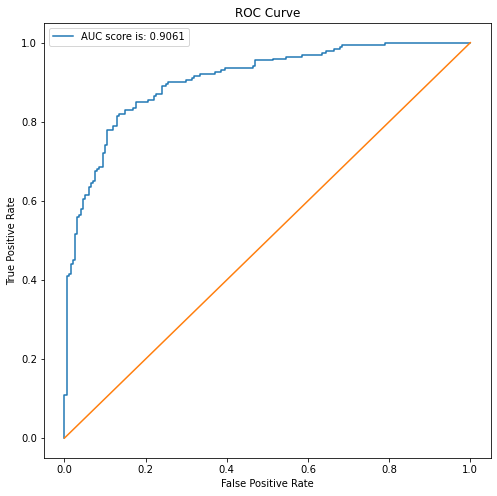

----------------------------------------------------
CJ-5


Accuracy Score:  0.8425
Precision Score:  0.88268156424581
Recall Score:  0.79
F1 Score:  0.8337730870712402
Balanced Accuracy Score:  0.8425
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       200
           1       0.88      0.79      0.83       200

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400


AUC:  0.916825


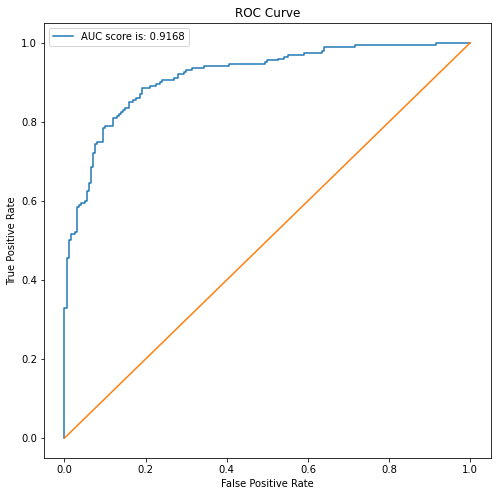

----------------------------------------------------
CJ-10


Accuracy Score:  0.8325
Precision Score:  0.8982035928143712
Recall Score:  0.75
F1 Score:  0.8174386920980926
Balanced Accuracy Score:  0.8325
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       200
           1       0.90      0.75      0.82       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400


AUC:  0.92015


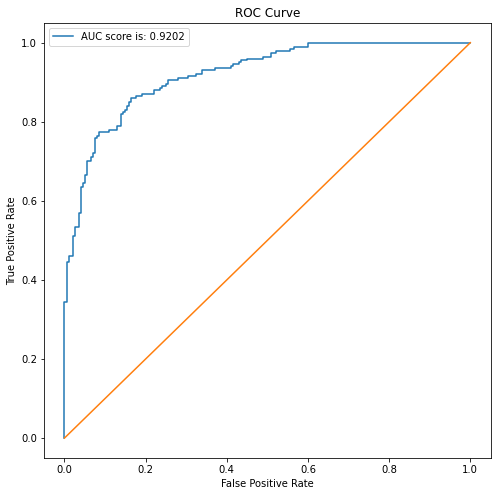

----------------------------------------------------
CJ-15


Accuracy Score:  0.8275
Precision Score:  0.8358974358974359
Recall Score:  0.815
F1 Score:  0.8253164556962025
Balanced Accuracy Score:  0.8274999999999999
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       200
           1       0.84      0.81      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400


AUC:  0.915325


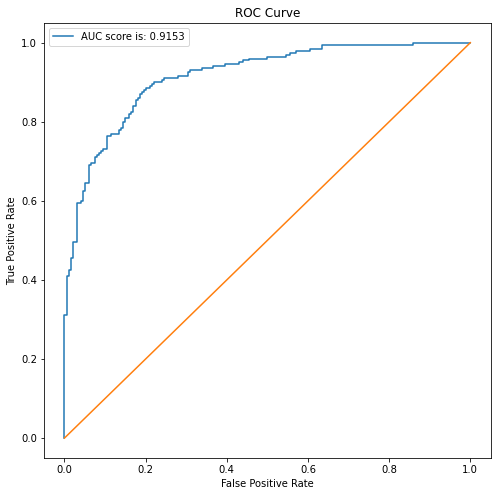

----------------------------------------------------
CJ-20


Accuracy Score:  0.845
Precision Score:  0.8709677419354839
Recall Score:  0.81
F1 Score:  0.8393782383419689
Balanced Accuracy Score:  0.845
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       200
           1       0.87      0.81      0.84       200

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400


AUC:  0.920075


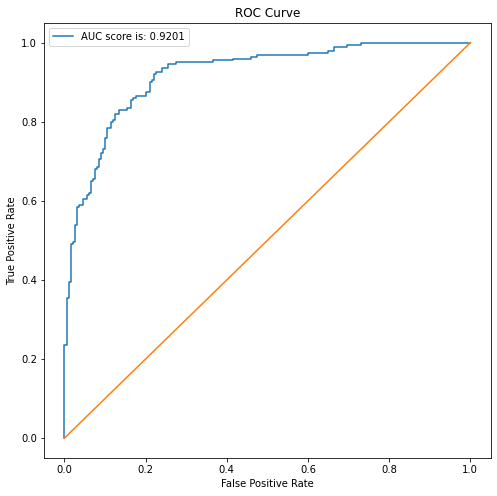

----------------------------------------------------


,Model,Accuracy Score,Precision Score,F1 Score,Balanced Accuracy Score,AUC Score
0,CJ-1,0.8350,0.868132,0.790,0.8350,0.906100
1,CJ-5,0.8425,0.882682,0.790,0.8425,0.916825
2,CJ-10,0.8325,0.898204,0.750,0.8325,0.920150
3,CJ-15,0.8275,0.835897,0.815,0.8275,0.915325
4,CJ-20,0.8450,0.870968,0.810,0.8450,0.920075


In [144]:
df1=pd.DataFrame(columns=["Model","Accuracy Score","Precision Score", "F1 Score","Balanced Accuracy Score","AUC Score"])
for i,aug in zip([cj1,cj5,cj10,cj15,cj20],['CJ-1','CJ-5','CJ-10','CJ-15','CJ-20']):
    
    _=print_model_results(i,aug,df1)
df1